##Data Wrangling II : Aplicacion de Pivot , Group by , Duplicates

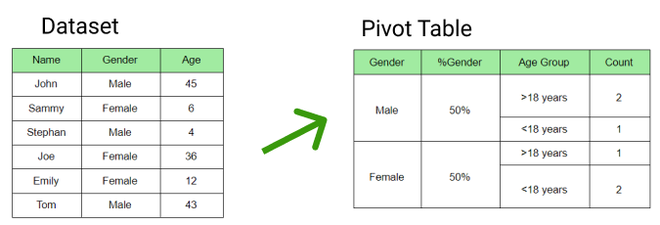

In [1]:
#Invocamos Librerias
import pandas as pd
import numpy as np

In [99]:
#Drop Duplicates
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})

In [95]:
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [96]:
df.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [97]:
df.drop_duplicates(subset=['brand'])

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5


In [100]:
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [98]:
df.drop_duplicates(subset=['brand', 'style'], keep='last')

,brand,style,rating
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
4,Indomie,pack,5.0


In [101]:
df.drop_duplicates(subset=['brand', 'style'], keep='first')

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0


In [102]:
#Leemos las bases :  
produccion = pd.read_csv('/content/produccion.csv')
segmentados = pd.read_csv('/content/segmentados.csv')

In [106]:
produccion.head()

,Unnamed: 0,PV_mon,ecoid,idnota
0,0,1,2730834530213863958,WMOGO3K4MVHMTBFFSKDYHDAAQI
1,1,1,2756568174664258526,WMOGO3K4MVHMTBFFSKDYHDAAQI
2,2,1,7660408829312986014,WMOGO3K4MVHMTBFFSKDYHDAAQI
3,3,1,4897213392905286555,WMOGO3K4MVHMTBFFSKDYHDAAQI
4,4,1,2604139720902631542,WMOGO3K4MVHMTBFFSKDYHDAAQI


In [108]:
produccion.shape

(179, 4)

In [107]:
produccion.drop_duplicates('idnota',keep='first',inplace=True);

In [109]:
#fusionando datasets por un campo en comun (primary key)
Seg_navegante = produccion.merge(segmentados, how='left', on="idnota")

In [110]:
Seg_navegante.head()

,Unnamed: 0_x,PV_mon,ecoid,idnota,Unnamed: 0_y,seccion,subseccion,titulo_nota,metadata,meta_new,Categoria
0,0,1,2730834530213863958,WMOGO3K4MVHMTBFFSKDYHDAAQI,2921.0,espectáculos,espectáculos,Melissa Paredes se molesta con reportera de Ma...,espectaculos espectaculos melissa paredes se m...,espectaculos espectaculos melissa paredes mole...,Espectaculo
1,458,1,891447685427965775,GQ2UHARQ5FERBGBBTJZIFPSZTA,3250.0,espectáculos,tv,Raúl Romero rompe su silencio sobre “Esto es H...,espectaculos tv raul romero rompe su silencio ...,espectaculos tv raul romero rompe silencio hab...,Espectaculo
2,466,1,2705661842854898463,5A4QQ66RKZEW5BTAHQ3TGWVEKM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,468,1,7456110854392693500,MXPOCBMNI5E3HNMUVRZAXNNOLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,469,1,577908918135704409,MHXVPWXLEJA3TE7FFLUFYN7NH4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
#Leeemos base completa : 
productividad_final = pd.read_csv('/content/produccion_merge.csv')

In [112]:
productividad_final

,Unnamed: 0,PV_mon,ecoid,idnota,seccion,subseccion,titulo_nota,metadata,meta_new,Categoria
0,0,1,2730834530213863958,WMOGO3K4MVHMTBFFSKDYHDAAQI,espectáculos,espectáculos,Melissa Paredes se molesta con reportera de Ma...,espectaculos espectaculos melissa paredes se m...,espectaculos espectaculos melissa paredes mole...,Espectaculo
1,1,1,2730834530213863958,WMOGO3K4MVHMTBFFSKDYHDAAQI,espectáculos,espectáculos,Melissa Paredes se molesta con reportera de Ma...,espectaculos espectaculos melissa paredes se m...,espectaculos espectaculos melissa paredes mole...,Tecnologia
2,2,1,2730834530213863958,WMOGO3K4MVHMTBFFSKDYHDAAQI,espectáculos,espectáculos,Melissa Paredes se molesta con reportera de Ma...,espectaculos espectaculos melissa paredes se m...,espectaculos espectaculos melissa paredes mole...,Redes_sociales
3,3,1,2756568174664258526,WMOGO3K4MVHMTBFFSKDYHDAAQI,espectáculos,espectáculos,Melissa Paredes se molesta con reportera de Ma...,espectaculos espectaculos melissa paredes se m...,espectaculos espectaculos melissa paredes mole...,Espectaculo
4,4,1,2756568174664258526,WMOGO3K4MVHMTBFFSKDYHDAAQI,espectáculos,espectáculos,Melissa Paredes se molesta con reportera de Ma...,espectaculos espectaculos melissa paredes se m...,espectaculos espectaculos melissa paredes mole...,Tecnologia
...,...,...,...,...,...,...,...,...,...,...
29995,29995,1,3691893192756013064,6PAGQ4SVPZGCHFG47KZINMJ7D4,opinion,pisapelota,La pareja de un seleccionado ha sido ampayada ...,opinion pisapelota la pareja de un seleccionad...,opinion pisapelota pareja seleccionado sido am...,Internacional
29996,29996,1,3691893192756013064,6PAGQ4SVPZGCHFG47KZINMJ7D4,opinion,pisapelota,La pareja de un seleccionado ha sido ampayada ...,opinion pisapelota la pareja de un seleccionad...,opinion pisapelota pareja seleccionado sido am...,Deporte_nacional
29997,29997,1,f32ebaec-2152-45c7-9709-b494da4a02c7,6PAGQ4SVPZGCHFG47KZINMJ7D4,opinion,pisapelota,La pareja de un seleccionado ha sido ampayada ...,opinion pisapelota la pareja de un seleccionad...,opinion pisapelota pareja seleccionado sido am...,Espectaculo
29998,29998,1,f32ebaec-2152-45c7-9709-b494da4a02c7,6PAGQ4SVPZGCHFG47KZINMJ7D4,opinion,pisapelota,La pareja de un seleccionado ha sido ampayada ...,opinion pisapelota la pareja de un seleccionad...,opinion pisapelota pareja seleccionado sido am...,Internacional


In [129]:
table = pd.pivot_table(productividad_final, values='PV_mon', index=['ecoid'],
                    columns=['Categoria'], aggfunc=np.sum).fillna(0)

In [ ]:
table

In [ ]:
table.reset_index()

In [ ]:
maxValues_1 = table
maxValueIndex_1 = maxValues_1.idxmax(axis = 1)
table["Segmento"]=maxValueIndex_1;
table.head(20)

In [121]:
table2 = pd.pivot_table(productividad_final, values=['PV_mon'], index=['ecoid'], aggfunc={'PV_mon':'sum'}).fillna(0)

In [ ]:
table2.head()

In [123]:
table2.reset_index()

,ecoid,PV_mon
0,03b351df-6a4b-4102-9667-8ae5c39cb3fb,3
1,0420a97f-4e29-471a-a821-14b2dc27f92c,2
2,042c50ed-a71a-44e8-b51e-a606b30c44ff,2
3,06bfa265-3095-468b-ae16-4ca34f08685e,3
4,090cb9c2-eb44-48f2-ae16-2cdf26b540bd,3
...,...,...
13006,f32ebaec-2152-45c7-9709-b494da4a02c7,3
13007,f62237f8-dffa-4ef1-9aaf-387b9966c1d2,2
13008,f7519e01-cc2f-4662-9f68-d7099289ad49,2
13009,f9a3fc75-b78c-4353-8244-311c1e6af755,1


In [124]:
table2.index

Index(['03b351df-6a4b-4102-9667-8ae5c39cb3fb',
       '0420a97f-4e29-471a-a821-14b2dc27f92c',
       '042c50ed-a71a-44e8-b51e-a606b30c44ff',
       '06bfa265-3095-468b-ae16-4ca34f08685e',
       '090cb9c2-eb44-48f2-ae16-2cdf26b540bd',
       '09b9bd03-9882-42c5-ab04-a0540651ae47',
       '0ae103af-f61b-42d4-bbc9-e5ac767d096b',
       '0aebb92c-68c2-489a-90bd-0023134820d4',
       '0b272eb2-0186-4c35-823f-ce67566bf3ef',
       '0bd24265-97e9-4c12-83c0-4bf91c215048',
       ...
       'eaa07e05-8b42-4f81-9807-f873ade43973',
       'ecfc3d03-1a7a-400e-8e1f-481cc49f6d27',
       'ed35e1c9-d909-4afe-a397-3b30f62cbb54',
       'eff72a3f-f803-4101-a46b-977f427acfdd',
       'f17ad006-6dfb-41e6-8744-ef1fbf7e34a8',
       'f32ebaec-2152-45c7-9709-b494da4a02c7',
       'f62237f8-dffa-4ef1-9aaf-387b9966c1d2',
       'f7519e01-cc2f-4662-9f68-d7099289ad49',
       'f9a3fc75-b78c-4353-8244-311c1e6af755',
       'f9e22a37-4c0d-495f-b5f1-ac18c4b04b3e'],
      dtype='object', name='ecoid', length=13011

In [125]:
table3 = table2.iloc[20:100,:]

In [126]:
table3.head()

,PV_mon
ecoid,
10036702397600680018,3
1004123107305121826,3
1004488089329727630,3
1004961033955214989,1
1005680088789995577,2


In [127]:
#Sort Clasico
table3.sort_values('PV_mon', ascending=True)

,PV_mon
ecoid,
1032252201043250288,1
1040688633504686342,1
10168646959649859155,1
10201878268922777994,1
1015497602327772933,1
...,...
1025313784459323062,3
1027934414518899826,3
1031335341493228249,3


In [76]:
table3.reset_index()

,ecoid,PV_mon
0,10036702397600680018,3
1,1004123107305121826,3
2,1004488089329727630,3
3,1004961033955214989,1
4,1005680088789995577,2
...,...,...
75,10421070893496824093,1
76,1042884147738846093,2
77,1044349362983087876,1
78,1044382575947550202,3


In [135]:
table['Segmento'].value_counts()

Espectaculo              5072
Redes_sociales           3910
Deporte_nacional         2173
Internacional             599
Emprendedor               333
Celebridades              283
Politica                  193
Tendencias                141
Economia                   81
Familia                    53
Estilo_de_vida             36
Deporte_internacional      17
Nacional                   14
Educacion                   6
Salud                       4
Policiales                  4
Tv_series                   2
Horoscopo                   1
Name: Segmento, dtype: int64

In [136]:
table['Segmento'] =table['Segmento'].astype(str)

In [137]:
table.unstack()

Categoria     ecoid                               
Celebridades  03b351df-6a4b-4102-9667-8ae5c39cb3fb                 0.0
              0420a97f-4e29-471a-a821-14b2dc27f92c                 0.0
              042c50ed-a71a-44e8-b51e-a606b30c44ff                 0.0
              06bfa265-3095-468b-ae16-4ca34f08685e                 0.0
              090cb9c2-eb44-48f2-ae16-2cdf26b540bd                 0.0
                                                            ...       
Segmento      f32ebaec-2152-45c7-9709-b494da4a02c7    Deporte_nacional
              f62237f8-dffa-4ef1-9aaf-387b9966c1d2      Redes_sociales
              f7519e01-cc2f-4662-9f68-d7099289ad49         Espectaculo
              f9a3fc75-b78c-4353-8244-311c1e6af755         Espectaculo
              f9e22a37-4c0d-495f-b5f1-ac18c4b04b3e    Deporte_nacional
Length: 271362, dtype: object

In [138]:
#Groupby : 
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
          ['Captive', 'Wild', 'Captive', 'Wild']]

In [139]:
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
df = pd.DataFrame({'Max Speed': [390., 350., 30., 20.]},
                  index=index)

In [140]:
df

Max Speed
Animal Type              
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

In [141]:
df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,370.0
Parrot,25.0


In [142]:
df.groupby(level="Type").mean()

,Max Speed
Type,
Captive,210.0
Wild,185.0


In [143]:
l = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]
df = pd.DataFrame(l, columns=["a", "b", "c"])

In [144]:
df.groupby(by=["b"]).sum()

,a,c
b,,
1.0,2,3
2.0,2,5


In [145]:
l = [["a", 12, 12], [None, 12.3, 33.], ["b", 12.3, 123], ["a", 1, 1]]
df = pd.DataFrame(l, columns=["a", "b", "c"])

In [147]:
df.groupby(by="a").std()

,b,c
a,,
a,7.778175,7.778175
b,NaN,NaN


In [148]:
#Apply : 
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9


In [149]:
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [83]:
df.apply(np.sum, axis=0) #Group by con Apply 

A    12
B    27
dtype: int64

In [84]:
df.apply(lambda x: [1, 2], axis=1)

0    [1, 2]
1    [1, 2]
2    [1, 2]
dtype: object

In [85]:
df.apply(lambda x: [1, 2], axis=1, result_type='expand')

,0,1
0,1,2
1,1,2
2,1,2


In [150]:
df.apply(lambda x: pd.Series([1, 2], index=['A', 'b']), axis=1)

,A,b
0,1,2
1,1,2
2,1,2


In [151]:
#Append: 
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'), index=['x', 'y'])
df

,A,B
x,1,2
y,3,4


In [88]:
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'), index=['x', 'y'])
df.append(df2)

,A,B
x,1,2
y,3,4
x,5,6
y,7,8


In [152]:
df.append(df2, ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8


In [153]:
df = pd.DataFrame(columns=['A'])
for i in range(5):
    df = df.append({'A': i}, ignore_index=True)
df

,A
0,0
1,1
2,2
3,3
4,4


In [154]:
pd.concat([pd.DataFrame([i], columns=['A']) for i in range(5)],
          ignore_index=True)

,A
0,0
1,1
2,2
3,3
4,4


In [155]:
#Sort Index: 
df = pd.DataFrame([1, 2, 3, 4, 5], index=[100, 29, 234, 1, 150], columns=['A'])

In [156]:
df.sort_index()

,A
1,4
29,2
100,1
150,5
234,3
